In [18]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from collections import defaultdict

### Задание 1 (3 балла). T-test

Напишите свою функцию `my_ttest_ind` аналогичную `scipy.stats.ttest_ind`.

Для реализации можно использовать только функции: `np.mean, np.sum, np.std, np.var, len, scipy.stats.t.cdf`.

Формулы для расчётов можно найти по ссылкам документации метода `scipy.stats.ttest_ind`:

    References
    .. [1] https://en.wikipedia.org/wiki/T-test#Independent_two-sample_t-test
    .. [2] https://en.wikipedia.org/wiki/Welch%27s_t-test

In [19]:
def my_ttest_ind(a, b, equal_var):
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    a_var = np.var(a, ddof=1)
    b_var = np.var(b, ddof=1)
    n1 = len(a)
    n2 = len(b)
    a_var_div_by_len = a_var / n1
    b_var_div_by_len = b_var / n2
    
    if equal_var:
        sp = np.sqrt(((n1 - 1) * a_var + (n2 - 1) * b_var) / (n1 + n2 - 2))
        t = (a_mean - b_mean) / (sp * np.sqrt(1 / n1 + 1 / n2))
        df = n1 + n2 - 2
    else:
        t = (a_mean - b_mean) / np.sqrt(a_var_div_by_len + b_var_div_by_len)
        df = (a_var_div_by_len + b_var_div_by_len)**2 / (a_var_div_by_len**2 / (n1 - 1) + b_var_div_by_len**2 / (n2 - 1))

    p_value = 2 * (1 - stats.t.cdf(abs(t), df=df))
    
    return t, p_value, df

In [20]:
# тесты
for _ in range(10):
    n1, n2 = np.random.randint(10, 100, 2)
    m1, m2, s1, s2 = np.random.uniform(0.1, 1, 4)
    a = np.random.normal(m1, s1, n1)
    b = np.random.normal(m2, s2, n2)
    for equal_var in [True, False]:
        true_res = stats.ttest_ind(a, b, equal_var=equal_var)
        my_res = my_ttest_ind(a, b, equal_var=equal_var)
        np.testing.assert_almost_equal(true_res[0], my_res[0], 7, f'Неверное statistic, equal_var={equal_var}')
        np.testing.assert_almost_equal(true_res[1], my_res[1], 7, f'Неверное pvalue, equal_var={equal_var}')
print('тесты пройдены')

тесты пройдены


### Задание 2 (2 балла). Статистика критерия Манна-Уитни

Статистика критерия Манна-Уитни (U) вычисляется как количество пар, в которых наблюдение из первой выборки больше наблюдения из второй выборки.

$$
U_X = \sum_{i=1}^{n_X}\sum_{j=1}^{n_Y} I(X_i,Y_j) ,\qquad где\ 
I(X_i,Y_j)=
\left\{
    \begin{aligned}
        1, X_i > Y_j \\
        0, X_i < Y_j
    \end{aligned}
\right. 
$$

$$
U = min(U_X, U_Y) 
$$

На лекции было определение через ранги
$$
U_X = R_X - \frac{n_X (n_X + 1)}{2}
$$

Докажите что эти определения эквивалентны. Предполагаем, что значения в выборках не повторяются.

### Решение

Вспомним определение из лекции. Мы должны отсортировать объекты из объединенной выборки(которая получена из смешивания объектов из выборки X и Y). Затем мы считаем $R_X$ как сумму рангов объектов из $X$ в отсортированной суммарной выборке, далее считаем статистику $U_X$. 

Пусть у нас объекты $X_1, X_2 \ldots X_n$ имеют ранги $R_{X_1}, R_{X_2}, \ldots R_{X_n}$ в обобщенной выборке, и ранги $R^{'}_{X_1}, R^{'}_{X_2}, \ldots R^{'}_{X_n}$ среди объектов только из своей выборки. Тогда будет выполнено свойство, что $\forall i \ R_{X_i} - R^{'}_{X_i} = \text{количество объектов из Y, меньших чем } X_i$. По своей сути ранг $X_i$ равен количеству объектов перед $X_i$ (другими словами меньше $X_i$) + 1(сам объект). Тогда действительно, если посмотреть ранг $X_i$ в обощенной выборке, вычесть из него количество объектов $X_j, j \neq i: X_j < X_i$, то полученное число будет равно количеству объектов из $Y$, которое меньше чем $X_i$. То есть равно именно 
$$\sum_{j=1}^{n_Y} I(X_i,Y_j)$$
Просуммируем тогда все эти разницы $R_{X_i} - R^{'}_{X_i}$:
$$\sum^{n_X}_{i=1}(R_{X_i}- R^{'}_{X_i}) = \sum^{n_X}_{i=1}R_{X_i} - \sum^{n_X}_{i=1}R^{'}_{X_i} = R_X - (1 + 2 + 3 + \ldots n_X) = R_X - \frac{n_X*(n_X+1)}{2} = U_X$$
Выше мы показали, что 
$$\sum^{n_X}_{i=1}(R_{X_i}- R^{'}_{X_i}) = \sum^{n_X}_{i=1}\sum_{j=1}^{n_Y} I(X_i,Y_j)$$
Таким образом, мы доказали, что
$$\sum^{n_X}_{i=1}\sum_{j=1}^{n_Y} I(X_i,Y_j) = R_X - \frac{n_X*(n_X+1)}{2} = U_X$$
Аналогичным образом все показывается для выборки $Y$, и получается, что определения эквивалентны.

### Задание 3 (5 баллов). Границы применимости критерия Манна-Уитни

На семинаре изучали границы применимости теста Стьюдента. Проведите аналогичные эксперименты для критерия Манна-Уитни `scipy.stats.mannwhitneyu`. Опишите полученные результаты.

Какие найдены отличия между критериями? Объясните, чем могут быть вызваны эти отличия.

1. Корректно ли работает критерий для данных из следующих распределений: нормальное, равномерное, экспоненциальное, логнормальное, биномиальное. Данные для обеих групп генерируйте из одинаковых распределений.
2. Корректно ли работает критерий, если данные из разных распределений с одинаковыми средними и дисперсиями? Проверьте для данных из нормального, равномерного и экспоненциального распределений.
3. Корректно ли работает критерий, если данные из одного распределения с одинаковыми средними и разными дисперсиями?
4. Корректно ли работает критерий с зависимыми данными?

In [21]:
def plot_pvalue_distribution(dict_pvalues, test_mode=False):
    """Рисует графики распределения pvalue."""
    X = np.linspace(0, 1, 1000)
    for key, pvalues in dict_pvalues.items():
        Y = [np.mean(pvalues <= x) for x in X]
        ks_pvalue = stats.ks_1samp(pvalues, lambda x: np.clip(x, 0, 1)).pvalue
        plt.plot(X, Y, label=f'{key}, ks_pvalue={ks_pvalue:0.3f}')
    plt.plot([0, 1], [0, 1], '--k', alpha=0.8)
    plt.title('Оценка распределения p-value', size=16)
    plt.xlabel('p-value', size=12)
    plt.legend(fontsize=12)
    plt.grid()
    plt.show()
    if test_mode:
        return Y, ks_pvalue

### 1

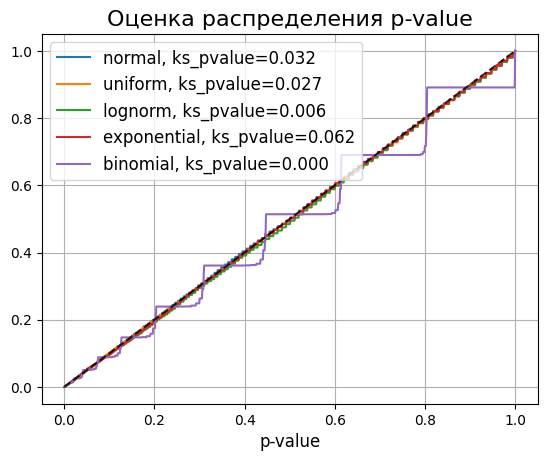

In [22]:
sample_size = 30
n_iter = 10000

dict_pvalues = defaultdict(list)
dict_datagen = {
    'normal': np.random.normal,
    'uniform': np.random.uniform,
    'lognorm': np.random.lognormal,
    'exponential': np.random.exponential,
    'binomial': lambda size: np.random.binomial(1, 0.5, size)
}

for name, datagen in dict_datagen.items():
    for _ in range(n_iter):
        a, b = datagen(size=(2, sample_size))
        pvalue = stats.mannwhitneyu(a, b).pvalue
        dict_pvalues[name].append(pvalue)
plot_pvalue_distribution(dict_pvalues)

Как видим, для выборок размером 30 тест Манна-Уитни довольно неуверен в том, что выборки из того же распределения. Конечно, при уровнях значимости меньше или равно 0.01, мы не отвергаем нулевую гипотезу, но при стандартном 0.05 мы отвергнем ее уже почти для всех распределений, кроме экспоненциального.Попробуем увеличить выборки.

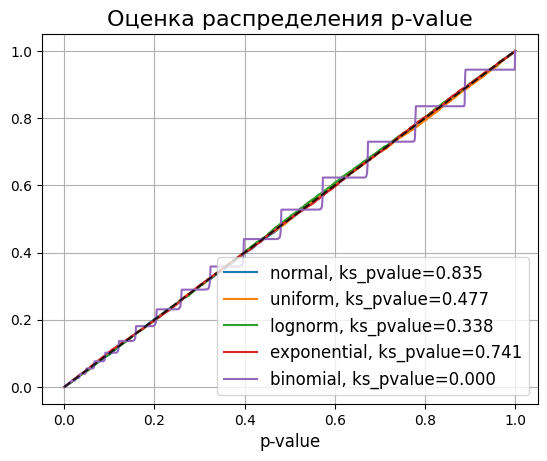

In [25]:
sample_size = 100
n_iter = 10000

dict_pvalues = defaultdict(list)
dict_datagen = {
    'normal': np.random.normal,
    'uniform': np.random.uniform,
    'lognorm': np.random.lognormal,
    'exponential': np.random.exponential,
    'binomial': lambda size: np.random.binomial(1, 0.5, size)
}

for name, datagen in dict_datagen.items():
    for _ in range(n_iter):
        a, b = datagen(size=(2, sample_size))
        pvalue = stats.mannwhitneyu(a, b).pvalue
        dict_pvalues[name].append(pvalue)
plot_pvalue_distribution(dict_pvalues)

Как видно из значений pvalue, мы уже довольно уверены в нулевой гипотезе - значения pvalue большие для всех распределений, кроме биномиального. Видимо, сходимость статистик U к нормальному довольно долгая. По сравнению с t-test ом, показанном на семинаре, тест Манна-Уитни корректно отработал для логнормального распределения, а также для экспоненциального(pvalue t-test при размере выборки 30 была 0.009, у нас же 0.062). То есть наверно можно говорить, что тест Манна-Уитни применим к большему количеству распределений(по крайненй мере из заданных). Однако, как и t-test, он не справился с биномиальным распределением. А со всеми остальными он работает корректно.

### 2

In [33]:
low = -12**0.5 / 2
print('uniform var =', stats.uniform.var(loc=low, scale=-2*low))
print('uniform mean =', stats.uniform.mean(loc=low, scale=-2*low))

print('expon var =', stats.expon.var(loc=-1))
print('expon mean =', stats.expon.mean(loc=-1))

sample_size = 10
n_iter = 10000

name2values = {
    'normal': np.random.normal(size=(n_iter, sample_size)),
    'uniform': np.random.uniform(low, -low, size=(n_iter, sample_size)),
    'expon': np.random.exponential(size=(n_iter, sample_size)) - 1 ,
}

for name, values in name2values.items():
    mean_ = np.mean(values)
    var_ = np.var(values)
    print(f'{name}: mean = {mean_:0.6f}, var = {var_:0.6f}')

uniform var = 0.9999999999999999
uniform mean = 0.0
expon var = 1.0
expon mean = 0.0
normal: mean = -0.001781, var = 0.995833
uniform: mean = 0.001933, var = 1.000460
expon: mean = 0.005321, var = 1.013277


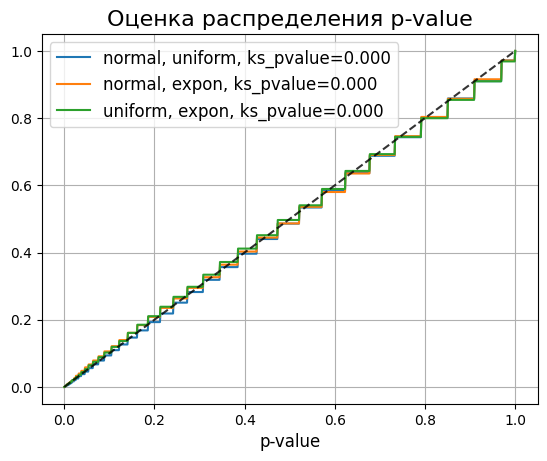

In [34]:
from itertools import combinations

dict_pvalues = defaultdict(list)
for name1, name2 in combinations(name2values.keys(), 2):
    for a, b in zip(name2values[name1], name2values[name2]):
        pvalue = stats.mannwhitneyu(a, b).pvalue
        dict_pvalues[f'{name1}, {name2}'].append(pvalue)
plot_pvalue_distribution(dict_pvalues)

Тест Манна-Уитни отлично справился с заданными распределениями, у которых равны средние и дисперсии! Действительно, распределения абсолютно разные, и полученные p-value нулевые - мы отвергаем гипотезу, что выборки из одного распределения. Но что будет, если размеры выборок будут больше или меньше?

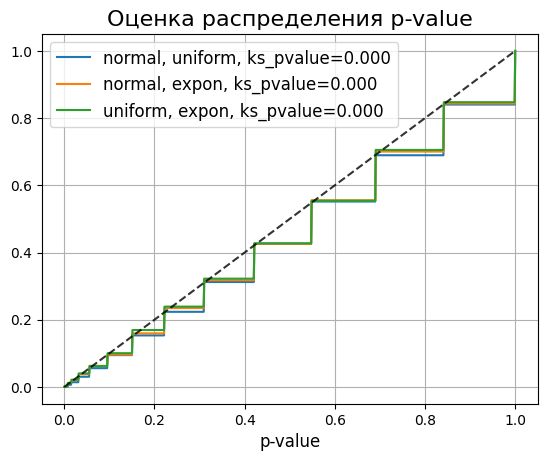

In [36]:
sample_size = 5
name2values = {
    'normal': np.random.normal(size=(n_iter, sample_size)),
    'uniform': np.random.uniform(low, -low, size=(n_iter, sample_size)),
    'expon': np.random.exponential(size=(n_iter, sample_size)) - 1 ,
}
dict_pvalues = defaultdict(list)
for name1, name2 in combinations(name2values.keys(), 2):
    for a, b in zip(name2values[name1], name2values[name2]):
        pvalue = stats.mannwhitneyu(a, b).pvalue
        dict_pvalues[f'{name1}, {name2}'].append(pvalue)
plot_pvalue_distribution(dict_pvalues)

Для маленьких выборок тест работает так же супер. Но видимо, критерию просто не хватает размеров выборки, поэтому он мог бы отвергнуть нулевую гипотезу о равенстве распределений, даже если бы выборки были из одного! Посмотрим, что будет, если выборки достаточно большие!

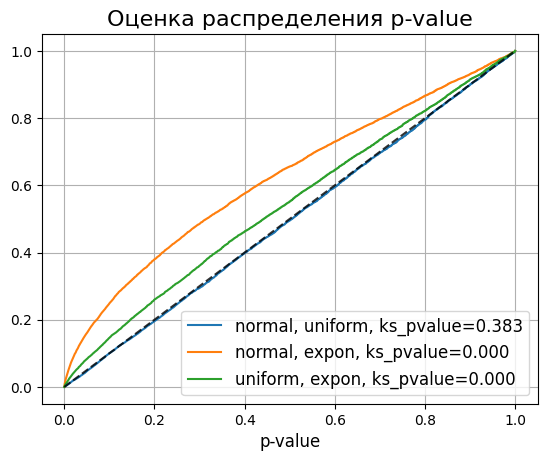

In [38]:
sample_size = 100
name2values = {
    'normal': np.random.normal(size=(n_iter, sample_size)),
    'uniform': np.random.uniform(low, -low, size=(n_iter, sample_size)),
    'expon': np.random.exponential(size=(n_iter, sample_size)) - 1 ,
}
dict_pvalues = defaultdict(list)
for name1, name2 in combinations(name2values.keys(), 2):
    for a, b in zip(name2values[name1], name2values[name2]):
        pvalue = stats.mannwhitneyu(a, b).pvalue
        dict_pvalues[f'{name1}, {name2}'].append(pvalue)
plot_pvalue_distribution(dict_pvalues)

Как мы видим из графика, pvalue случая, где одна выборка из нормального, а другая из равномерного распределения довольно велико. Действительно, равномерное распределение с серединой в нуле и нормальное распределение с нулевым средним даже визуально покрывают схожие участки прямой, если судить по pdf(то есть массе распределения). Таким образом критерий Манна-Уитни, вообще говоря, некорректно сработал для пары нормальное и равномерное распределений, а вот отличить экспоненциальное распределение от нормального или равномерного он смог, pvalue даже нулевое. 

### 3

Рассмотрим случаи, когда дисперсия отличается не сильно

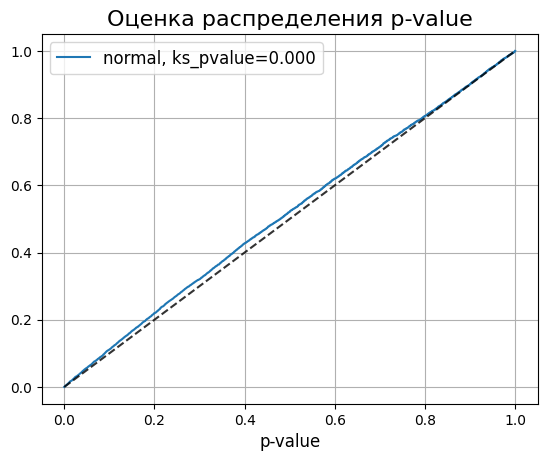

In [39]:
sample_size = 100
n_iter = 10000

dict_pvalues = defaultdict(list)
for _ in range(n_iter):
    a = np.random.normal(0, 1, size=sample_size)
    b = np.random.normal(0, 2, size=sample_size)
    pvalue = stats.mannwhitneyu(a, b).pvalue
    dict_pvalues['normal'].append(pvalue)
plot_pvalue_distribution(dict_pvalues)

Тест сработал корректно! Но что будет, если дисперсии отличаются незначительно? Или слишком сильно?

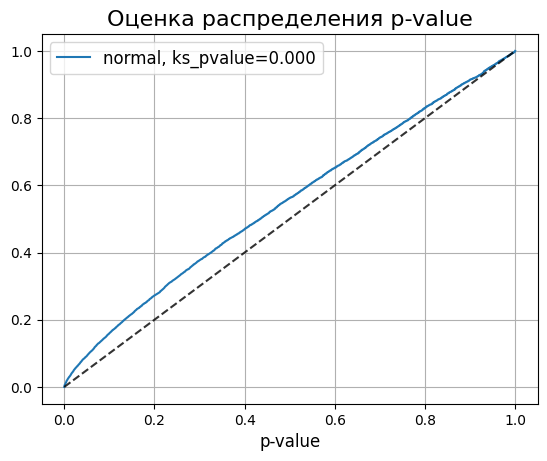

In [41]:
sample_size = 100
n_iter = 10000

dict_pvalues = defaultdict(list)
for _ in range(n_iter):
    a = np.random.normal(0, 1, size=sample_size)
    b = np.random.normal(0, 10, size=sample_size)
    pvalue = stats.mannwhitneyu(a, b).pvalue
    dict_pvalues['normal'].append(pvalue)
plot_pvalue_distribution(dict_pvalues)

Как и ожидалось, тест сработал корректно - выборки то из разных распределений!

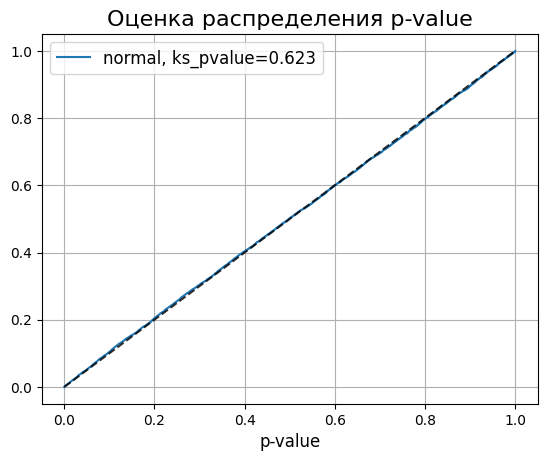

In [42]:
sample_size = 100
n_iter = 10000

dict_pvalues = defaultdict(list)
for _ in range(n_iter):
    a = np.random.normal(0, 1, size=sample_size)
    b = np.random.normal(0, 1.3, size=sample_size)
    pvalue = stats.mannwhitneyu(a, b).pvalue
    dict_pvalues['normal'].append(pvalue)
plot_pvalue_distribution(dict_pvalues)

А вот здесь беда! Распределения различны, у одной выборки распределение со стандартным отклоенением 1, у другой - 1.3. Но тест Манна-Уитни не может отвергнуть нулевую гипотезу. То есть если дисперсии отличаются несильно, критерий работае некорректно!

### 4

Проверим случай, когдвы выборки зависимы. Например, две выборки из скореллированных нормальных распределений.

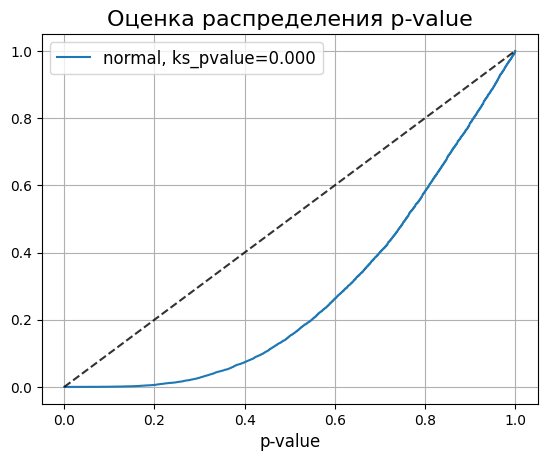

In [54]:
mean = 0
std_dev = 1
correlation = 0.8

sample_size = 100
n_iter = 10000

dict_pvalues = defaultdict(list)
for _ in range(n_iter):
    a = np.random.normal(mean, std_dev, sample_size)
    b = np.random.normal(mean, std_dev, sample_size)
    b = correlation * a + np.sqrt(1 - correlation**2) * b
    pvalue = stats.mannwhitneyu(a, b).pvalue
    dict_pvalues['normal'].append(pvalue)
plot_pvalue_distribution(dict_pvalues)

Корреляция довольно сильная, выборки имеют нормальное распределение с одним и тем же средним и дисперсией! Однако критерий выдает p_value нулевым, что означает отклонение нулевой гипотезы. Критерий сработал некорреткно.

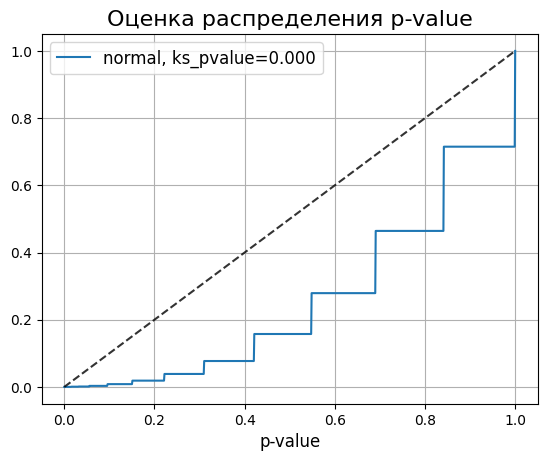

In [49]:
sample_size = 5
n_iter = 10000

dict_pvalues = defaultdict(list)
for _ in range(n_iter):
    a = np.random.normal(mean, std_dev, sample_size)
    b = np.random.normal(mean, std_dev, sample_size)
    b = correlation * a + np.sqrt(1 - correlation**2) * b
    pvalue = stats.mannwhitneyu(a, b).pvalue
    dict_pvalues['normal'].append(pvalue)
plot_pvalue_distribution(dict_pvalues)

Даже так, с большим размером выборок, тест Манна-Уитни различает их.

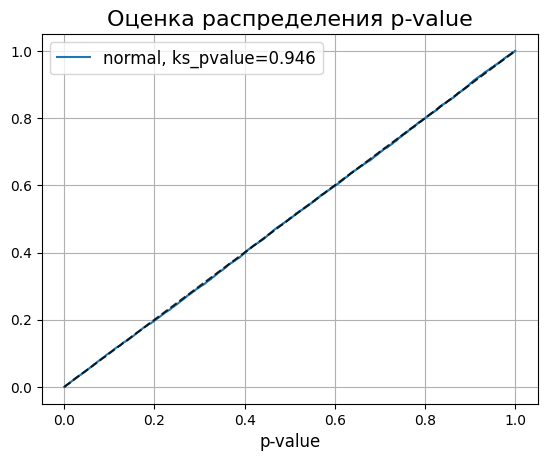

In [57]:
mean = 0
std_dev = 1
correlation = 0

sample_size = 100
n_iter = 10000

dict_pvalues = defaultdict(list)
for _ in range(n_iter):
    a = np.random.normal(mean, std_dev, sample_size)
    b = np.random.normal(mean, std_dev, sample_size)
    b = correlation * a + np.sqrt(1 - correlation**2) * b
    pvalue = stats.mannwhitneyu(a, b).pvalue
    dict_pvalues['normal'].append(pvalue)
plot_pvalue_distribution(dict_pvalues)

Если две выборки независимы, то критерий работает уже корректно! Независимость объектов в выборке и между самими выборками играет очень существенную роль! При нарушении данного условия, как мы видим, критерий перестает работать корректно.